<a href="https://colab.research.google.com/github/soju1jan/modoo/blob/master/16_MNIST_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch 00001: val_loss improved from inf to 0.05835, saving model to /content/drive/My Drive/10_colab_dataset/model4/01-0.0583.hdf5

Epoch 00002: val_loss improved from 0.05835 to 0.04363, saving model to /content/drive/My Drive/10_colab_dataset/model4/02-0.0436.hdf5

Epoch 00003: val_loss improved from 0.04363 to 0.03745, saving model to /content/drive/My Drive/10_colab_dataset/model4/03-0.0375.hdf5

Epoch 00004: val_loss improved from 0.03745 to 0.03156, saving model to /content/drive/My Drive/10_colab_dataset/model4/04-0.0316.hdf5

Epoch 00005: val_loss did not improve from 0.03156

Epoch 00006: val_loss did not improve from 0.03156

Epoch 00007: val_loss did not improve from 0.03156

Epoch 00008: val_loss did not improve from 0.03156

Epoch 00009: val_loss did not improve from 0.03156

Epoch 00010: val_loss improved from 0.03156 to 0.02988, saving model to /content/drive/My Drive/10_colab_dataset/model4/10-0.0299.hdf5

Epoch 00011: val_loss improved from 0.02988 to 0.02796, saving 

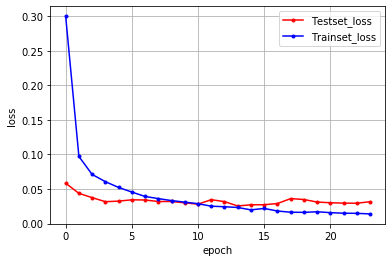

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 저장 폴더 설정 => 구글 드라이브에 저장
MODEL_DIR = '/content/drive/My Drive/10_colab_dataset/model4/'
if not os.path.exists(MODEL_DIR): 
  os.mkdir(MODEL_DIR)

modelpath="/content/drive/My Drive/10_colab_dataset/model4/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, 
                    batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()